<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Proyecto-ASE-I/blob/main/S_ASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)

In [6]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Natalidad_02.xlsx to Natalidad_02.xlsx


In [8]:
df=pd.read_excel("Natalidad_02.xlsx", header=0)
df

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.8,19.2,19.4,19.4,19.2,18.2,17.8,17.9,17.5,17.0,15.1,15.3
1,Aguascalientes,18.4,18.9,18.9,18.8,19.8,17.8,17.3,18.2,18.4,17.2,15.5,16.0
2,Baja California,20.3,20.6,20.0,19.8,20.0,18.9,18.8,18.9,18.0,17.3,13.3,13.3
3,Baja California Sur,19.7,19.1,18.7,17.9,18.1,16.7,16.5,16.2,15.5,13.9,12.8,13.2
4,Campeche,20.2,21.0,19.9,20.1,20.2,19.4,18.6,18.0,17.6,16.8,13.1,13.6
5,Coahuila de Zaragoza,21.8,22.7,23.1,23.1,22.6,22.0,21.7,20.8,20.5,19.0,17.2,16.6
6,Colima,19.6,18.8,19.2,19.1,19.0,17.2,16.5,16.6,16.8,15.3,14.9,13.6
7,Chiapas,18.8,19.5,19.9,20.1,20.1,18.4,18.7,18.3,18.2,18.8,17.1,17.4
8,Chihuahua,23.0,23.2,23.0,22.3,22.5,21.4,20.9,21.4,20.4,19.8,17.6,18.2
9,Ciudad de México,16.5,16.6,16.6,16.4,15.8,14.4,13.9,13.5,12.9,12.3,9.7,10.6


In [9]:
#Elimino datos NaN
df.drop(df.index[33:44], inplace=True)
df

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.8,19.2,19.4,19.4,19.2,18.2,17.8,17.9,17.5,17.0,15.1,15.3
1,Aguascalientes,18.4,18.9,18.9,18.8,19.8,17.8,17.3,18.2,18.4,17.2,15.5,16.0
2,Baja California,20.3,20.6,20.0,19.8,20.0,18.9,18.8,18.9,18.0,17.3,13.3,13.3
3,Baja California Sur,19.7,19.1,18.7,17.9,18.1,16.7,16.5,16.2,15.5,13.9,12.8,13.2
4,Campeche,20.2,21.0,19.9,20.1,20.2,19.4,18.6,18.0,17.6,16.8,13.1,13.6
5,Coahuila de Zaragoza,21.8,22.7,23.1,23.1,22.6,22.0,21.7,20.8,20.5,19.0,17.2,16.6
6,Colima,19.6,18.8,19.2,19.1,19.0,17.2,16.5,16.6,16.8,15.3,14.9,13.6
7,Chiapas,18.8,19.5,19.9,20.1,20.1,18.4,18.7,18.3,18.2,18.8,17.1,17.4
8,Chihuahua,23.0,23.2,23.0,22.3,22.5,21.4,20.9,21.4,20.4,19.8,17.6,18.2
9,Ciudad de México,16.5,16.6,16.6,16.4,15.8,14.4,13.9,13.5,12.9,12.3,9.7,10.6


In [10]:
df.max()

Entidad federativa de residencia habitual de la madre    Zacatecas
2010                                                          23.0
2011                                                          23.2
2012                                                          23.1
2013                                                          23.1
2014                                                          22.6
2015                                                          22.0
2016                                                          21.7
2017                                                          21.4
2018                                                          20.5
2019                                                          19.8
2020                                                          18.2
2021                                                          18.2
dtype: object

In [11]:
from pandas.io.formats import style
df.style.highlight_max(color='deeppink')
#Este es un formato simplificado con el que los valores con los que trabajamos hacen sentido

,Entidad federativa de residencia habitual de la madre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Estados Unidos Mexicanos,18.800000,19.200000,19.400000,19.400000,19.200000,18.200000,17.800000,17.900000,17.500000,17.000000,15.100000,15.300000
1,Aguascalientes,18.400000,18.900000,18.900000,18.800000,19.800000,17.800000,17.300000,18.200000,18.400000,17.200000,15.500000,16.000000
2,Baja California,20.300000,20.600000,20.000000,19.800000,20.000000,18.900000,18.800000,18.900000,18.000000,17.300000,13.300000,13.300000
3,Baja California Sur,19.700000,19.100000,18.700000,17.900000,18.100000,16.700000,16.500000,16.200000,15.500000,13.900000,12.800000,13.200000
4,Campeche,20.200000,21.000000,19.900000,20.100000,20.200000,19.400000,18.600000,18.000000,17.600000,16.800000,13.100000,13.600000
5,Coahuila de Zaragoza,21.800000,22.700000,23.100000,23.100000,22.600000,22.000000,21.700000,20.800000,20.500000,19.000000,17.200000,16.600000
6,Colima,19.600000,18.800000,19.200000,19.100000,19.000000,17.200000,16.500000,16.600000,16.800000,15.300000,14.900000,13.600000
7,Chiapas,18.800000,19.500000,19.900000,20.100000,20.100000,18.400000,18.700000,18.300000,18.200000,18.800000,17.100000,17.400000
8,Chihuahua,23.000000,23.200000,23.000000,22.300000,22.500000,21.400000,20.900000,21.400000,20.400000,19.800000,17.600000,18.200000
9,Ciudad de México,16.500000,16.600000,16.600000,16.400000,15.800000,14.400000,13.900000,13.500000,12.900000,12.300000,9.700000,10.600000


In [12]:
df_2010=df[['Entidad federativa de residencia habitual de la madre', '2010']].style.highlight_max(color='pink')
e_2010=df['2010'].max()
es_2010=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo del año 2010 es:", e_2010, "y correspone a la entidad: ", es_2010 )
df_2010

El % máximo del año 2010 es: 23.0 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2010
0,Estados Unidos Mexicanos,18.800000
1,Aguascalientes,18.400000
2,Baja California,20.300000
3,Baja California Sur,19.700000
4,Campeche,20.200000
5,Coahuila de Zaragoza,21.800000
6,Colima,19.600000
7,Chiapas,18.800000
8,Chihuahua,23.000000
9,Ciudad de México,16.500000


In [25]:
datos=df.groupby("Entidad federativa de residencia habitual de la madre").mean()
datos=datos.reset_index()

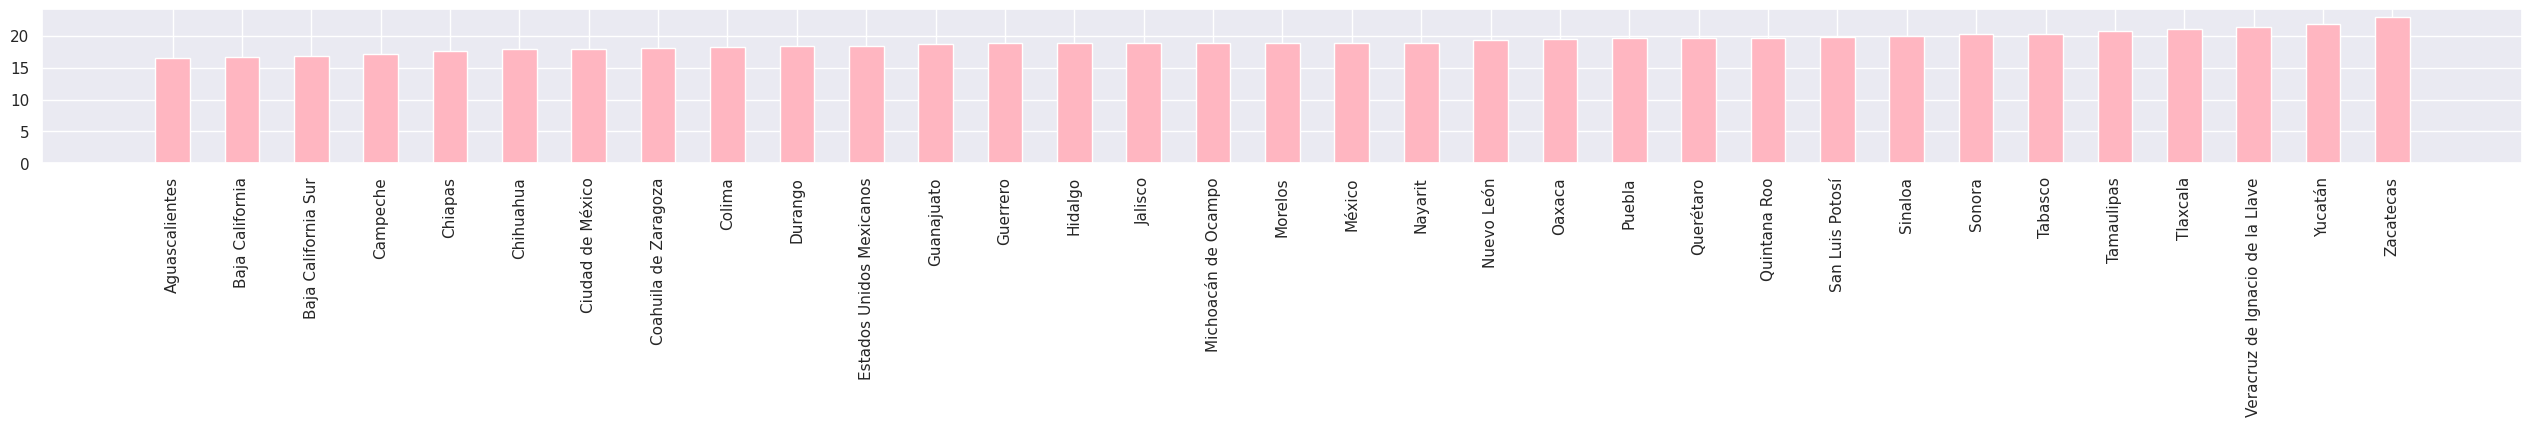

In [32]:
bars=list(datos['Entidad federativa de residencia habitual de la madre'])
height=list(datos['2010'])
height=sorted(height)
plt.figure(figsize=(32,2))
plt.bar(bars, height, color="lightpink", width=0.5)
plt.xticks(rotation=90)
plt.show()

In [33]:
df_2k10=pd.DataFrame_2k10(df_2010, columns=["% de embarazos por estado"])
df_2k10.plot(x="Estados", y=["% de embarazos por estado"], kind="bar",figsize=(9,8))
plt.show()

AttributeError: ignored

In [34]:
df_2010..value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("% de adolescentes embarazadas en 2010")
plt.ylabel('%')
plt.xlabel('Estados');

SyntaxError: ignored

In [35]:
df_2011=df[['Entidad federativa de residencia habitual de la madre', '2011']]
e_2011=df['2011'].max()
es_2011=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2011, "y correspone a la entidad: ", es_2011 )
df_2011

El % máximo de este año es: 23.2 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2011
0,Estados Unidos Mexicanos,19.2
1,Aguascalientes,18.9
2,Baja California,20.6
3,Baja California Sur,19.1
4,Campeche,21.0
5,Coahuila de Zaragoza,22.7
6,Colima,18.8
7,Chiapas,19.5
8,Chihuahua,23.2
9,Ciudad de México,16.6


In [36]:
df_2012=df[['Entidad federativa de residencia habitual de la madre', '2012']]
e_2012=df['2012'].max()
es_2012=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2012, "y correspone a la entidad: ", es_2012 )
df_2012

El % máximo de este año es: 23.1 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2012
0,Estados Unidos Mexicanos,19.4
1,Aguascalientes,18.9
2,Baja California,20.0
3,Baja California Sur,18.7
4,Campeche,19.9
5,Coahuila de Zaragoza,23.1
6,Colima,19.2
7,Chiapas,19.9
8,Chihuahua,23.0
9,Ciudad de México,16.6


In [37]:
df_2013=df[['Entidad federativa de residencia habitual de la madre', '2013']]
e_2013=df['2013'].max()
es_2013=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2013, "y correspone a la entidad: ", es_2013)
df_2013

El % máximo de este año es: 23.1 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2013
0,Estados Unidos Mexicanos,19.4
1,Aguascalientes,18.8
2,Baja California,19.8
3,Baja California Sur,17.9
4,Campeche,20.1
5,Coahuila de Zaragoza,23.1
6,Colima,19.1
7,Chiapas,20.1
8,Chihuahua,22.3
9,Ciudad de México,16.4


In [38]:
df_2013=df[['Entidad federativa de residencia habitual de la madre', '2013']]
e_2013=df['2013'].max()
es_2013=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2013, "y correspone a la entidad: ", es_2013)
df_2013

El % máximo de este año es: 23.1 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2013
0,Estados Unidos Mexicanos,19.4
1,Aguascalientes,18.8
2,Baja California,19.8
3,Baja California Sur,17.9
4,Campeche,20.1
5,Coahuila de Zaragoza,23.1
6,Colima,19.1
7,Chiapas,20.1
8,Chihuahua,22.3
9,Ciudad de México,16.4


In [39]:
df_2014=df[['Entidad federativa de residencia habitual de la madre', '2014']]
e_2014=df['2014'].max()
es_2014=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2014, "y correspone a la entidad: ", es_2014)
df_2014

El % máximo de este año es: 22.6 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2014
0,Estados Unidos Mexicanos,19.2
1,Aguascalientes,19.8
2,Baja California,20.0
3,Baja California Sur,18.1
4,Campeche,20.2
5,Coahuila de Zaragoza,22.6
6,Colima,19.0
7,Chiapas,20.1
8,Chihuahua,22.5
9,Ciudad de México,15.8


In [40]:
df_2015=df[['Entidad federativa de residencia habitual de la madre', '2015']]
e_2015=df['2015'].max()
es_2015=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2015, "y correspone a la entidad: ", es_2015)
df_2015

El % máximo de este año es: 22.0 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2015
0,Estados Unidos Mexicanos,18.2
1,Aguascalientes,17.8
2,Baja California,18.9
3,Baja California Sur,16.7
4,Campeche,19.4
5,Coahuila de Zaragoza,22.0
6,Colima,17.2
7,Chiapas,18.4
8,Chihuahua,21.4
9,Ciudad de México,14.4


In [41]:
df_2016=df[['Entidad federativa de residencia habitual de la madre', '2016']]
e_2016=df['2016'].max()
es_2016=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2016, "y correspone a la entidad: ", es_2016)
df_2016

El % máximo de este año es: 21.7 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2016
0,Estados Unidos Mexicanos,17.8
1,Aguascalientes,17.3
2,Baja California,18.8
3,Baja California Sur,16.5
4,Campeche,18.6
5,Coahuila de Zaragoza,21.7
6,Colima,16.5
7,Chiapas,18.7
8,Chihuahua,20.9
9,Ciudad de México,13.9


In [42]:
df_2017=df[['Entidad federativa de residencia habitual de la madre', '2017']]
e_2017=df['2017'].max()
es_2017=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2017, "y correspone a la entidad: ", es_2017)
df_2017

El % máximo de este año es: 21.4 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2017
0,Estados Unidos Mexicanos,17.9
1,Aguascalientes,18.2
2,Baja California,18.9
3,Baja California Sur,16.2
4,Campeche,18.0
5,Coahuila de Zaragoza,20.8
6,Colima,16.6
7,Chiapas,18.3
8,Chihuahua,21.4
9,Ciudad de México,13.5


In [43]:
df_2018=df[['Entidad federativa de residencia habitual de la madre', '2018']]
e_2018=df['2018'].max()
es_2018=df['Entidad federativa de residencia habitual de la madre'].iloc[5]
print("El % máximo de este año es:", e_2018, "y correspone a la entidad: ", es_2018)
df_2018

El % máximo de este año es: 20.5 y correspone a la entidad:  Coahuila de Zaragoza


,Entidad federativa de residencia habitual de la madre,2018
0,Estados Unidos Mexicanos,17.5
1,Aguascalientes,18.4
2,Baja California,18.0
3,Baja California Sur,15.5
4,Campeche,17.6
5,Coahuila de Zaragoza,20.5
6,Colima,16.8
7,Chiapas,18.2
8,Chihuahua,20.4
9,Ciudad de México,12.9


In [44]:
df_2019=df[['Entidad federativa de residencia habitual de la madre', '2019']]
e_2019=df['2019'].max()
es_2019=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2019, "y correspone a la entidad: ", es_2019)
df_2019

El % máximo de este año es: 19.8 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2019
0,Estados Unidos Mexicanos,17.0
1,Aguascalientes,17.2
2,Baja California,17.3
3,Baja California Sur,13.9
4,Campeche,16.8
5,Coahuila de Zaragoza,19.0
6,Colima,15.3
7,Chiapas,18.8
8,Chihuahua,19.8
9,Ciudad de México,12.3


In [45]:
df_2020=df[['Entidad federativa de residencia habitual de la madre', '2020']]
e_2020=df['2020'].max()
es_2020=df['Entidad federativa de residencia habitual de la madre'].iloc[12]
print("El % máximo de este año es:", e_2020, "y correspone a la entidad: ", es_2020)
df_2020

El % máximo de este año es: 18.2 y correspone a la entidad:  Guerrero


,Entidad federativa de residencia habitual de la madre,2020
0,Estados Unidos Mexicanos,15.1
1,Aguascalientes,15.5
2,Baja California,13.3
3,Baja California Sur,12.8
4,Campeche,13.1
5,Coahuila de Zaragoza,17.2
6,Colima,14.9
7,Chiapas,17.1
8,Chihuahua,17.6
9,Ciudad de México,9.7


In [46]:
df_2021=df[['Entidad federativa de residencia habitual de la madre', '2021']]
e_2021=df['2020'].max()
es_2021=df['Entidad federativa de residencia habitual de la madre'].iloc[8]
print("El % máximo de este año es:", e_2021, "y correspone a la entidad: ", es_2021)
df_2021

El % máximo de este año es: 18.2 y correspone a la entidad:  Chihuahua


,Entidad federativa de residencia habitual de la madre,2021
0,Estados Unidos Mexicanos,15.3
1,Aguascalientes,16.0
2,Baja California,13.3
3,Baja California Sur,13.2
4,Campeche,13.6
5,Coahuila de Zaragoza,16.6
6,Colima,13.6
7,Chiapas,17.4
8,Chihuahua,18.2
9,Ciudad de México,10.6
